In [1]:
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.2 MB 15.5 MB/s 
     |████████████████████████████████| 944 kB 49.7 MB/s 
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.2.2
    Uninstalling matplotlib-3.2.2:
      Successfully uninstalled matplotlib-3.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [1]:
!pip install holidays_es

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from sqlalchemy import create_engine
import seaborn as sns
from datetime import timedelta, date, datetime
from sklearn import linear_model
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from holidays_es import Province
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.style.use('fivethirtyeight')
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

In [4]:
from google.colab import files
import io
uploaded = files.upload()

Saving Global DataBase3.csv to Global DataBase3.csv
Saving Global DataBase2 daily.csv to Global DataBase2 daily.csv


In [5]:
df1=pd.read_csv(io.BytesIO(uploaded['Global DataBase2 daily.csv']), index_col='datetime_per_day', parse_dates=True, dayfirst = True)

df2=pd.read_csv(io.BytesIO(uploaded['Global DataBase3.csv']), index_col='datetime', parse_dates=True, dayfirst = True)


df1 = df1.loc['2017-01-01':'2022-02-28']
df2 = df2.loc['2017-01-01':'2022-02-28']

index = pd.date_range(start='2017-01-01', end='2022-02-28', freq="1d")
columns = ["datetime_per_month", 'Price - PT [€/MWh]','Price - ES [€/MWh]','Actual Consumption (MWh)','Biomass AA','Fossil Gas AA','Fossil Hard Coal AC', 'Hydro Pumped Storage AA','Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA','Hydro Water Reservoir AA', 'Other AA', 'Solar AA','Wind Onshore AA','Electricity Consumption (MWh)']

df = pd.DataFrame(np.nan, index=range(0,index.size), columns=columns)
df["datetime_per_month"] = index
df.set_index("datetime_per_month", inplace=True)

df = df.resample("M").mean()


columns1 = ['Electricity Consumption (MWh)']
for column in columns1 : 
    df[column] = df2[column].resample("M").sum()
columns2=['Price - PT [€/MWh]','Price - ES [€/MWh]','Actual Consumption (MWh)','Biomass AA','Fossil Gas AA','Fossil Hard Coal AC', 'Hydro Pumped Storage AA','Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA','Hydro Water Reservoir AA', 'Other AA', 'Solar AA','Wind Onshore AA']
for column in columns2 : 
    df[column] = df2[column].resample("M").mean()
df = df.sort_index()

df = df.dropna()

In [6]:
df = df.loc[:"2021-01-01 00:00:00"]

In [7]:
df.drop(['Price - ES [€/MWh]'],  axis=1, inplace=True )
df.drop(['Actual Consumption (MWh)'],  axis=1, inplace=True )
df

,Price - PT [€/MWh],Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh)
datetime_per_month,,,,,,,,,,,,
2017-01-31,71.517497,338.602961,1926.737550,0.877524,388.152086,252.629879,662.546433,263.314939,39.647376,64.668910,1551.962315,3651348
2017-02-28,51.430655,345.169643,1683.818452,2.802083,401.322917,195.026786,879.328869,400.203869,39.644345,64.669643,1964.936012,3303272
2017-03-31,43.956841,329.528226,1669.485215,5.295699,352.517473,329.188172,861.833333,192.053763,37.668011,87.571237,1707.607527,3657194
2017-04-30,44.178000,330.077778,1552.405556,3.691667,363.401389,424.690278,452.277778,102.688889,37.898611,113.830556,1359.748611,3539220
2017-05-31,47.121747,299.209677,1888.045699,0.819892,278.341398,273.907258,412.969086,85.852151,19.724462,112.423387,1099.305108,3657194
2017-06-30,50.220153,313.891667,2290.356944,0.604167,193.025000,214.313889,322.426389,121.094444,33.261111,121.830556,1120.715278,3539220
2017-07-31,48.604099,320.857527,2665.786290,2.834677,210.823925,148.611559,170.409946,137.018817,38.051075,125.655914,1195.255376,3657194
2017-08-31,47.434825,326.838710,2774.299731,0.420699,208.465054,151.653226,207.293011,153.927419,37.555108,122.217742,1105.120968,3657194
2017-09-30,49.161833,311.419444,2281.848611,0.441667,188.704167,163.168056,185.198611,124.648611,38.362500,114.073611,1148.684722,3539220


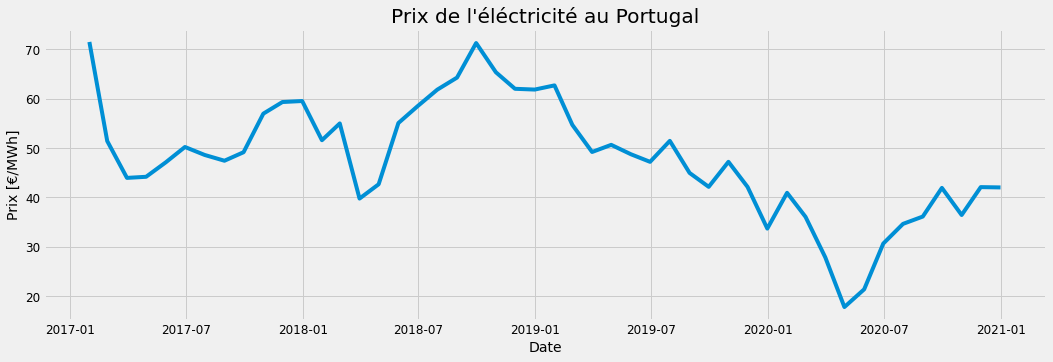

In [8]:
plt.figure(figsize=(16,5))
plt.gca().set(title="Prix de l'éléctricité au Portugal", xlabel='Date', ylabel='Prix [€/MWh]')
plt.plot(df.index, df['Price - PT [€/MWh]']) 
plt.show()

In [9]:
#Détecter les valeurs négatives
df.describe()

,Price - PT [€/MWh],Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh)
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,4.800000e+01
mean,47.945799,319.880493,1851.257444,6.851749,342.976716,222.659938,670.905915,264.210952,42.847721,113.914211,1419.639267,3.590712e+06
std,11.855658,51.404136,518.119940,5.006812,146.637460,83.293190,447.844072,191.240121,28.177809,37.723234,439.207028,9.697770e+04
min,17.769722,179.631720,795.329167,0.320833,139.448611,35.514785,134.618280,59.084722,19.724462,59.809140,588.300000,3.303272e+06
25%,41.998359,307.275896,1536.776949,2.301848,241.961257,177.056127,316.043918,144.078293,29.002016,82.516645,1101.072110,3.539220e+06
50%,48.019462,327.006720,1864.940188,7.227039,319.303472,216.517159,569.786062,202.683333,33.259722,113.315143,1359.627282,3.657194e+06
75%,55.555511,350.828136,2265.687903,10.641801,393.704613,269.743280,871.950161,300.048118,38.682961,133.750605,1703.505676,3.657194e+06
max,71.517497,387.678763,2774.299731,19.201389,872.926075,424.690278,1900.375000,749.767473,142.915323,202.423387,2681.933333,3.657194e+06


In [10]:
#Données manquntes

df.isnull().values.any()

False

In [11]:
#Ajout des attributs supplémentaires  : Mois, type du jour, jour férié

def add_extra_attributes(df): 
    holidays= []
    holidays.append(Province(name="malaga",year=2017).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2017).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2017).holidays().get('regional_holidays'))

    
    holidays.append(Province(name="malaga",year=2018).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2018).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2018).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2019).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2019).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2019).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2020).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2020).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2020).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2021).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2021).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2021).holidays().get('regional_holidays'))

    holidays.append(Province(name="malaga",year=2022).holidays().get('local_holidays'))
    holidays.append(Province(name="malaga",year=2022).holidays().get('national_holidays'))
    holidays.append(Province(name="malaga",year=2022).holidays().get('regional_holidays'))
    
    holidays_dates=[]
    for i in range (len(holidays)):
        for j in range (len(holidays[i])):
            holidays_dates.append(holidays[i][j])
    df_holidays=pd.DataFrame({'Holidays': holidays_dates})

    df['holiday'] =0
    df['weekday']=0
    df['month']=0

    for i in range (len(df.index)):
        if (df.index[i].weekday() == 5 or df.index[i].weekday() == 6):
            df['weekday'][i]=1
        df['month'][i]= df.index[i].month
            
        for j in range (len(df_holidays)):
            if (df.index[i] == df_holidays['Holidays'][j]):
                df['holiday'][i]=1
    return df      


df_extra=add_extra_attributes(df)

In [12]:
df=df_extra[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)','holiday','weekday','month','Price - PT [€/MWh]']].dropna()

df

,Biomass AA,Fossil Gas AA,Fossil Hard Coal AC,Hydro Pumped Storage AA,Hydro Pumped Storage AC,Hydro Run-of-river and poundage AA,Hydro Water Reservoir AA,Other AA,Solar AA,Wind Onshore AA,Electricity Consumption (MWh),holiday,weekday,month,Price - PT [€/MWh]
datetime_per_month,,,,,,,,,,,,,,,
2017-01-31,338.602961,1926.737550,0.877524,388.152086,252.629879,662.546433,263.314939,39.647376,64.668910,1551.962315,3651348,0,0,1,71.517497
2017-02-28,345.169643,1683.818452,2.802083,401.322917,195.026786,879.328869,400.203869,39.644345,64.669643,1964.936012,3303272,1,0,2,51.430655
2017-03-31,329.528226,1669.485215,5.295699,352.517473,329.188172,861.833333,192.053763,37.668011,87.571237,1707.607527,3657194,0,0,3,43.956841
2017-04-30,330.077778,1552.405556,3.691667,363.401389,424.690278,452.277778,102.688889,37.898611,113.830556,1359.748611,3539220,0,1,4,44.178000
2017-05-31,299.209677,1888.045699,0.819892,278.341398,273.907258,412.969086,85.852151,19.724462,112.423387,1099.305108,3657194,0,0,5,47.121747
2017-06-30,313.891667,2290.356944,0.604167,193.025000,214.313889,322.426389,121.094444,33.261111,121.830556,1120.715278,3539220,0,0,6,50.220153
2017-07-31,320.857527,2665.786290,2.834677,210.823925,148.611559,170.409946,137.018817,38.051075,125.655914,1195.255376,3657194,0,0,7,48.604099
2017-08-31,326.838710,2774.299731,0.420699,208.465054,151.653226,207.293011,153.927419,37.555108,122.217742,1105.120968,3657194,0,0,8,47.434825
2017-09-30,311.419444,2281.848611,0.441667,188.704167,163.168056,185.198611,124.648611,38.362500,114.073611,1148.684722,3539220,0,1,9,49.161833


In [13]:
from pylab import rcParams

def eval_model(train_y, pred_ytrain, test_y, pred_y, model, att):
    rcParams['figure.figsize'] = 14, 6

    scores = [[ metrics.mean_absolute_error(train_y, pred_ytrain),  np.sqrt(metrics.mean_squared_error(train_y, pred_ytrain)), np.sqrt(metrics.mean_squared_error(train_y, pred_ytrain))/train_y.mean()],
    [ metrics.mean_absolute_error(test_y, pred_y),  np.sqrt(metrics.mean_squared_error(test_y, pred_y)), np.sqrt(metrics.mean_squared_error(test_y, pred_y))/test_y.mean()]]

    labels = ['MAE', 'RMSE', 'CV']

    p = np.arange(len(labels))

    width = 0.25

    fig, ax = plt.subplots()

    rects1 = ax.bar(p - width/2, scores[0], width, label='Train')
    rects2 = ax.bar(p + width/2, scores[1], width, label='Test')

    ax.set_title( model + ' Model - ' + att + ' attribute selection')
    ax.set_xticks(p)
    ax.set_xticklabels(labels)
    ax.legend()

    ax.bar_label(rects1, padding=3)
    ax.bar_label(rects2, padding=3)

    fig.tight_layout()

    plt.show() 

In [14]:
def print_results(train_y, pred_ytrain, test_y, pred_y, exec_time):
    print('************* Train results *************')

    print('Mean Absolute Error:', '%.5f' %  metrics.mean_absolute_error(train_y, pred_ytrain))
    print('Root Mean Squared Error:','%.5f' %  np.sqrt(metrics.mean_squared_error(train_y, pred_ytrain)))
    print('Coefficient of Variance:', '%.5f' %  ((np.sqrt(metrics.mean_squared_error(train_y, pred_ytrain))/train_y.mean())*100))

    print('************* Test results *************')

    print('Mean Absolute Error:', '%.5f' % metrics.mean_absolute_error(test_y, pred_y))
    print('Root Mean Squared Error:', '%.5f' % np.sqrt(metrics.mean_squared_error(test_y, pred_y)))
    print('Coefficient of Variance:', '%.5f' % ((np.sqrt(metrics.mean_squared_error(test_y, pred_y))/test_y.mean())*100))
    print('R2' , '%.5f' % metrics.r2_score(train_y, pred_ytrain))

    print('****************************************')
    print('Execution Time:', '%.5f' %  exec_time)

### XGBRegressor

In [15]:
import xgboost as xgb

X = df.values[:, :-1] #Features
y = df.values[:, -1] #output

xgbr = xgb.XGBRegressor(verbosity=0)
xgbr.fit(X, y)

feature_names = np.array(df[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month']].columns)
sfs_forward = SequentialFeatureSelector(xgbr, n_features_to_select=7, direction='forward').fit(X, y)
print("Features selected by forward sequential selection: "  f"{feature_names[sfs_forward.get_support()]}")
sfs_backward = SequentialFeatureSelector(xgbr, n_features_to_select=7, direction='backward').fit(X, y)
print("Features selected by backward sequential selection: "  f"{feature_names[sfs_backward.get_support()]}")

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15)

xgbr = xgb.XGBRegressor(verbosity=0)
start_time = time.time()
xgbr.fit(xtrain, ytrain)
exec_time = time.time()-start_time

ypredtr = xgbr.predict(xtrain)
ypredts = xgbr.predict(xtest)
print_results(ytrain, ypredtr, ytest, ypredts, exec_time)

Features selected by forward sequential selection: ['Fossil Hard Coal AC' 'Hydro Water Reservoir AA' 'Other AA'
 'Electricity Consumption (MWh)' 'holiday' 'weekday' 'month']
Features selected by backward sequential selection: ['Fossil Gas AA' 'Fossil Hard Coal AC' 'Hydro Pumped Storage AC'
 'Hydro Run-of-river and poundage AA' 'Hydro Water Reservoir AA'
 'Other AA' 'month']
************* Train results *************
Mean Absolute Error: 0.23254
Root Mean Squared Error: 0.29096
Coefficient of Variance: 0.61078
************* Test results *************
Mean Absolute Error: 4.99101
Root Mean Squared Error: 6.47712
Coefficient of Variance: 13.08914
R2 0.99947
****************************************
Execution Time: 0.05024


In [16]:
X = sfs_backward.transform(X) 

xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.15)

xgbr = xgb.XGBRegressor(verbosity=0)
start_time = time.time()
xgbr.fit(xtrain, ytrain)
exec_time = time.time()-start_time

ypredtr = xgbr.predict(xtrain)
ypredts = xgbr.predict(xtest)
print_results(ytrain, ypredtr, ytest, ypredts, exec_time)

************* Train results *************
Mean Absolute Error: 0.19571
Root Mean Squared Error: 0.26627
Coefficient of Variance: 0.55816
************* Test results *************
Mean Absolute Error: 9.81537
Root Mean Squared Error: 10.83635
Coefficient of Variance: 22.04884
R2 0.99948
****************************************
Execution Time: 0.05055


### MLR

In [17]:
X = df.values[:, :-1] #Features
y = df.values[:, -1] #output

#Normalisation
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [18]:
reg=linear_model.LinearRegression()
reg.fit(X, y)

feature_names = np.array(df[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month']].columns)
sfs_forward = SequentialFeatureSelector(reg, n_features_to_select=7, direction='forward').fit(X, y)
print("Features selected by forward sequential selection: "  f"{feature_names[sfs_forward.get_support()]}")
sfs_backward = SequentialFeatureSelector(reg, n_features_to_select=7, direction='backward').fit(X, y)
print("Features selected by backward sequential selection: "  f"{feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection: ['Biomass AA' 'Fossil Hard Coal AC' 'Hydro Pumped Storage AA'
 'Hydro Pumped Storage AC' 'Hydro Water Reservoir AA' 'Solar AA' 'weekday']
Features selected by backward sequential selection: ['Biomass AA' 'Hydro Pumped Storage AA' 'Hydro Pumped Storage AC'
 'Solar AA' 'Electricity Consumption (MWh)' 'holiday' 'weekday']


In [19]:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.1)

reg = linear_model.LinearRegression()

start_time = time.time()
model = reg.fit(train_X, train_y)
exec_time = time.time()-start_time
pred_y = model.predict(test_X)
pred_ytrain = model.predict(train_X)

In [20]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 4.76074
Root Mean Squared Error: 5.91150
Coefficient of Variance: 12.62524
************* Test results *************
Mean Absolute Error: 5.25029
Root Mean Squared Error: 6.65059
Coefficient of Variance: 11.54558
R2 0.74005
****************************************
Execution Time: 0.00108


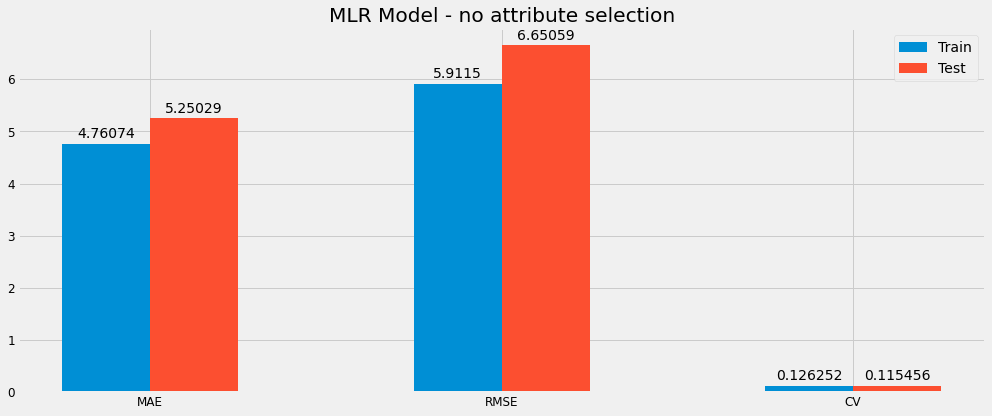

In [21]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "MLR", "no")

#### Selection d'attributs

In [22]:
#Features selection 
X = sfs_backward.transform(X) 

train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.1)

reg = linear_model.LinearRegression()

start_time = time.time()
model = reg.fit(train_X, train_y)
exec_time = time.time()-start_time
pred_y = model.predict(test_X)
pred_ytrain = model.predict(train_X)

In [23]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 5.16476
Root Mean Squared Error: 6.49811
Coefficient of Variance: 13.46620
************* Test results *************
Mean Absolute Error: 7.42944
Root Mean Squared Error: 8.60277
Coefficient of Variance: 18.99616
R2 0.70476
****************************************
Execution Time: 0.00104


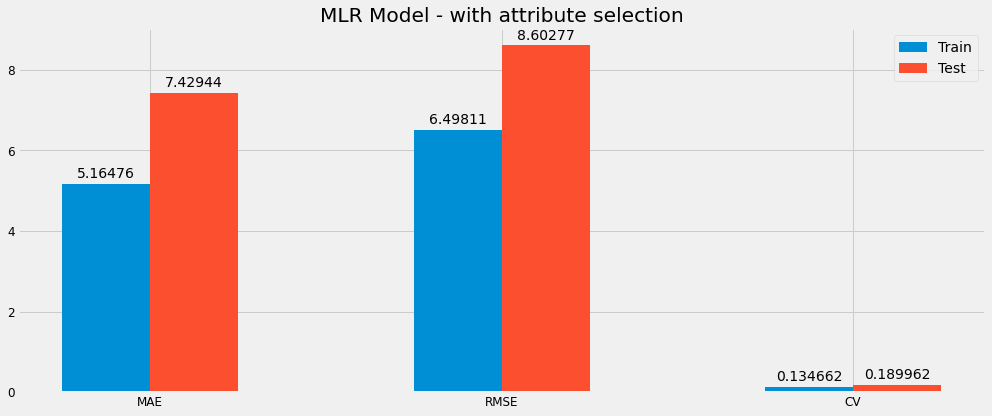

In [24]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "MLR", "with")

### SVR

In [25]:
df=df_extra[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month', 'Price - PT [€/MWh]']]

X = df.values[:, :-1] #Features
y = df.values[:, -1] #output

#Normalisation
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [26]:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.1)

params = {'kernel': ('linear','poly','rbf'),
          'C':[0.01,0.1,1,10],
          'gamma': [1e-7, 1e-4, 0.001, 0.1, 1],
          'epsilon':[0.1,0.2,0.3,0.5]}

svr = SVR()

grid_search = GridSearchCV(svr, param_grid=params ,cv=10, n_jobs=-1, verbose=0)
start_time = time.time()
grid_search.fit(train_X, train_y)
exec_time = time.time()-start_time

print(grid_search.best_params_)

model = grid_search.best_estimator_
pred_y = model.predict(test_X)

pred_ytrain = model.predict(train_X)

{'C': 10, 'epsilon': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}


In [27]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 6.05177
Root Mean Squared Error: 9.09501
Coefficient of Variance: 19.05073
************* Test results *************
Mean Absolute Error: 6.13362
Root Mean Squared Error: 7.26470
Coefficient of Variance: 14.61504
R2 0.42570
****************************************
Execution Time: 4.37584


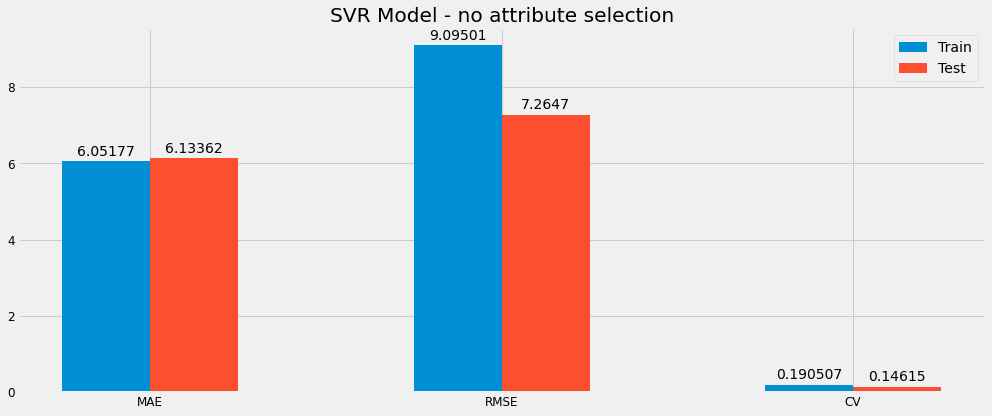

In [28]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "SVR", "no")

Selection d'attributs

In [29]:
svr=SVR()
svr.fit(X, y)

feature_names = np.array(df[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month']].columns)
sfs_forward = SequentialFeatureSelector(svr, n_features_to_select=7, direction='forward').fit(X, y)
print("Features selected by forward sequential selection: "  f"{feature_names[sfs_forward.get_support()]}")
sfs_backward = SequentialFeatureSelector(svr, n_features_to_select=7, direction='backward').fit(X, y)
print("Features selected by backward sequential selection: "  f"{feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection: ['Biomass AA' 'Fossil Hard Coal AC' 'Hydro Pumped Storage AA'
 'Hydro Pumped Storage AC' 'Other AA' 'Electricity Consumption (MWh)'
 'holiday']
Features selected by backward sequential selection: ['Biomass AA' 'Fossil Hard Coal AC' 'Hydro Pumped Storage AA'
 'Hydro Pumped Storage AC' 'Other AA' 'Electricity Consumption (MWh)'
 'holiday']


In [30]:
#Features selection 
X = sfs_backward.transform(X) 

train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.1)

grid_search = GridSearchCV(svr, param_grid=params ,cv=10, n_jobs=-1, verbose=0)
start_time=time.time()
grid_search.fit(train_X, train_y)
exec_time= time.time()-start_time

print(grid_search.best_params_)

model=grid_search.best_estimator_
pred_y=model.predict(test_X)

pred_ytrain=model.predict(train_X)

{'C': 10, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'rbf'}


In [31]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 5.35393
Root Mean Squared Error: 8.11878
Coefficient of Variance: 16.94982
************* Test results *************
Mean Absolute Error: 4.56524
Root Mean Squared Error: 5.19715
Coefficient of Variance: 10.74923
R2 0.56063
****************************************
Execution Time: 3.23044


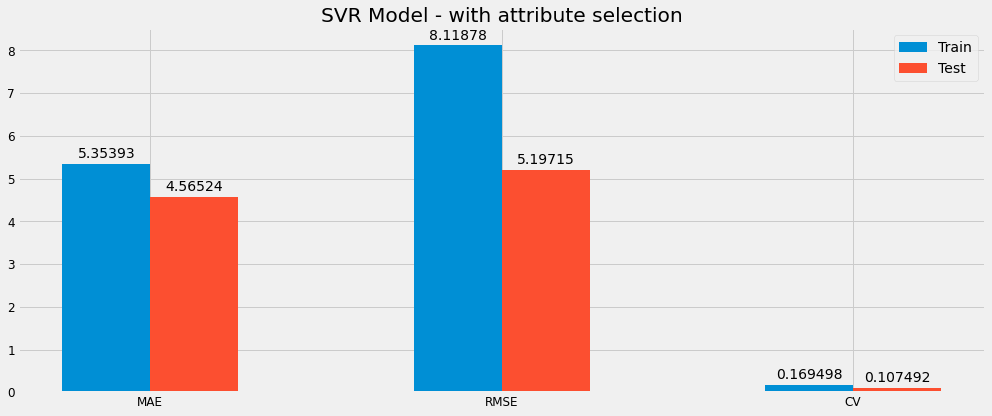

In [32]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "SVR", "with")

RF

In [33]:
df=df_extra[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month','Price - PT [€/MWh]']]

X=df.values[:, :-1] #Features
y=df.values[:, -1] #output

#Normalisation
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [34]:
train_X, test_X, train_y, test_y = train_test_split( X, y, test_size = 0.1)

#Parameters Tunning
params = { 'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt'], 'max_depth' : [4,5,6,7,8,10],'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10]}

rf=RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid=params ,cv=10, n_jobs=-1, verbose=0)
start_time = time.time()
grid_search.fit(train_X, train_y)
exec_time = time.time()-start_time

print(grid_search.best_params_)

model=grid_search.best_estimator_
pred_y=model.predict(test_X)

pred_ytrain=model.predict(train_X)

{'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [35]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 3.13768
Root Mean Squared Error: 4.29086
Coefficient of Variance: 8.97083
************* Test results *************
Mean Absolute Error: 4.84914
Root Mean Squared Error: 5.56688
Coefficient of Variance: 11.37707
R2 0.87154
****************************************
Execution Time: 745.93560


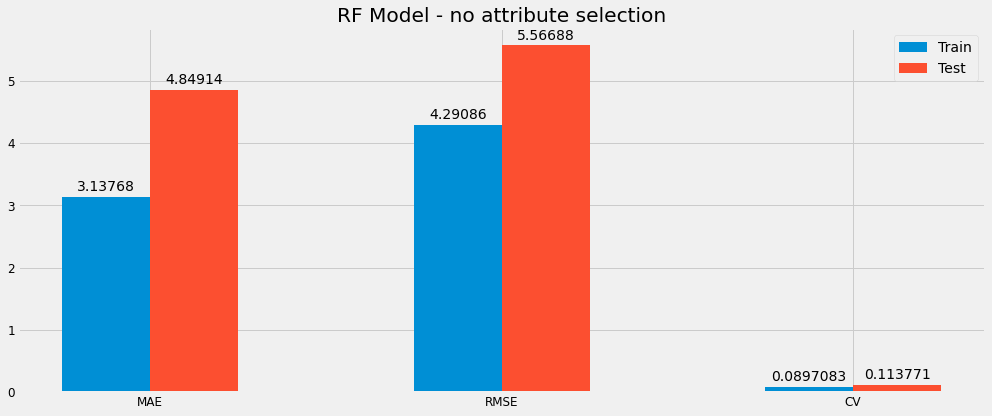

In [36]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "RF", "no")

Selection d'attributs

In [37]:
rf=RandomForestRegressor()
rf.fit(X, y)

feature_names = np.array(df[['Biomass AA', 'Fossil Gas AA', 'Fossil Hard Coal AC','Hydro Pumped Storage AA', 'Hydro Pumped Storage AC','Hydro Run-of-river and poundage AA', 'Hydro Water Reservoir AA','Other AA', 'Solar AA', 'Wind Onshore AA','Electricity Consumption (MWh)' ,'holiday', 'weekday', 'month']].columns)
sfs_forward = SequentialFeatureSelector(rf, n_features_to_select=7, direction='forward').fit(X, y)
print("Features selected by forward sequential selection: "  f"{feature_names[sfs_forward.get_support()]}")
sfs_backward = SequentialFeatureSelector(rf, n_features_to_select=7, direction='backward').fit(X, y)
print("Features selected by backward sequential selection: "  f"{feature_names[sfs_backward.get_support()]}")

Features selected by forward sequential selection: ['Fossil Gas AA' 'Fossil Hard Coal AC' 'Hydro Pumped Storage AC'
 'Other AA' 'Solar AA' 'holiday' 'month']
Features selected by backward sequential selection: ['Fossil Hard Coal AC' 'Hydro Pumped Storage AC'
 'Hydro Water Reservoir AA' 'Wind Onshore AA' 'holiday' 'weekday' 'month']


In [38]:
#Features selection 
X = sfs_backward.transform(X) 

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1)
rf=RandomForestRegressor()

grid_search = GridSearchCV(rf, param_grid=params ,cv=10, n_jobs=-1, verbose=0)
start_time=time.time()
grid_search.fit(train_X, train_y)
exec_time= time.time()-start_time

model=grid_search.best_estimator_
pred_y=model.predict(test_X)

print(grid_search.best_params_)

pred_ytrain=model.predict(train_X)

{'max_depth': 6, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [39]:
print_results(train_y, pred_ytrain, test_y, pred_y, exec_time)

************* Train results *************
Mean Absolute Error: 2.61262
Root Mean Squared Error: 3.36089
Coefficient of Variance: 7.04433
************* Test results *************
Mean Absolute Error: 8.90603
Root Mean Squared Error: 9.96665
Coefficient of Variance: 19.94598
R2 0.91294
****************************************
Execution Time: 730.11224


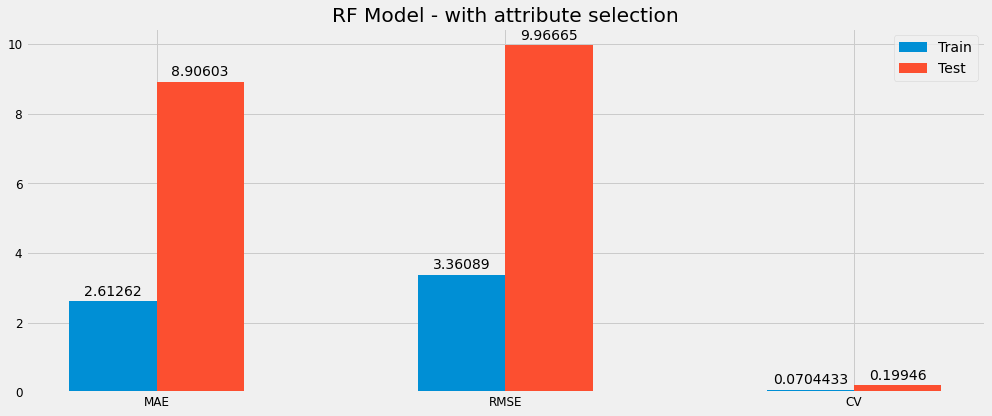

In [40]:
eval_model(train_y, pred_ytrain, test_y, pred_y, "RF", "with")